In [1]:
import pm4py

In [2]:
from pm4py.objects.log.importer.xes import factory as xes_importer
log = xes_importer.apply('RequestForPayment.xes')

/Users/vladlenatrus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use importer entrypoint instead
  


In [3]:
from pm4py.algo.discovery.dfg import factory as dfg_factory

dfg = dfg_factory.apply(log)

/Users/vladlenatrus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use algorithm entrypoint instead
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/vladlenatrus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vladlenatrus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  after removing the cwd from sys.path.


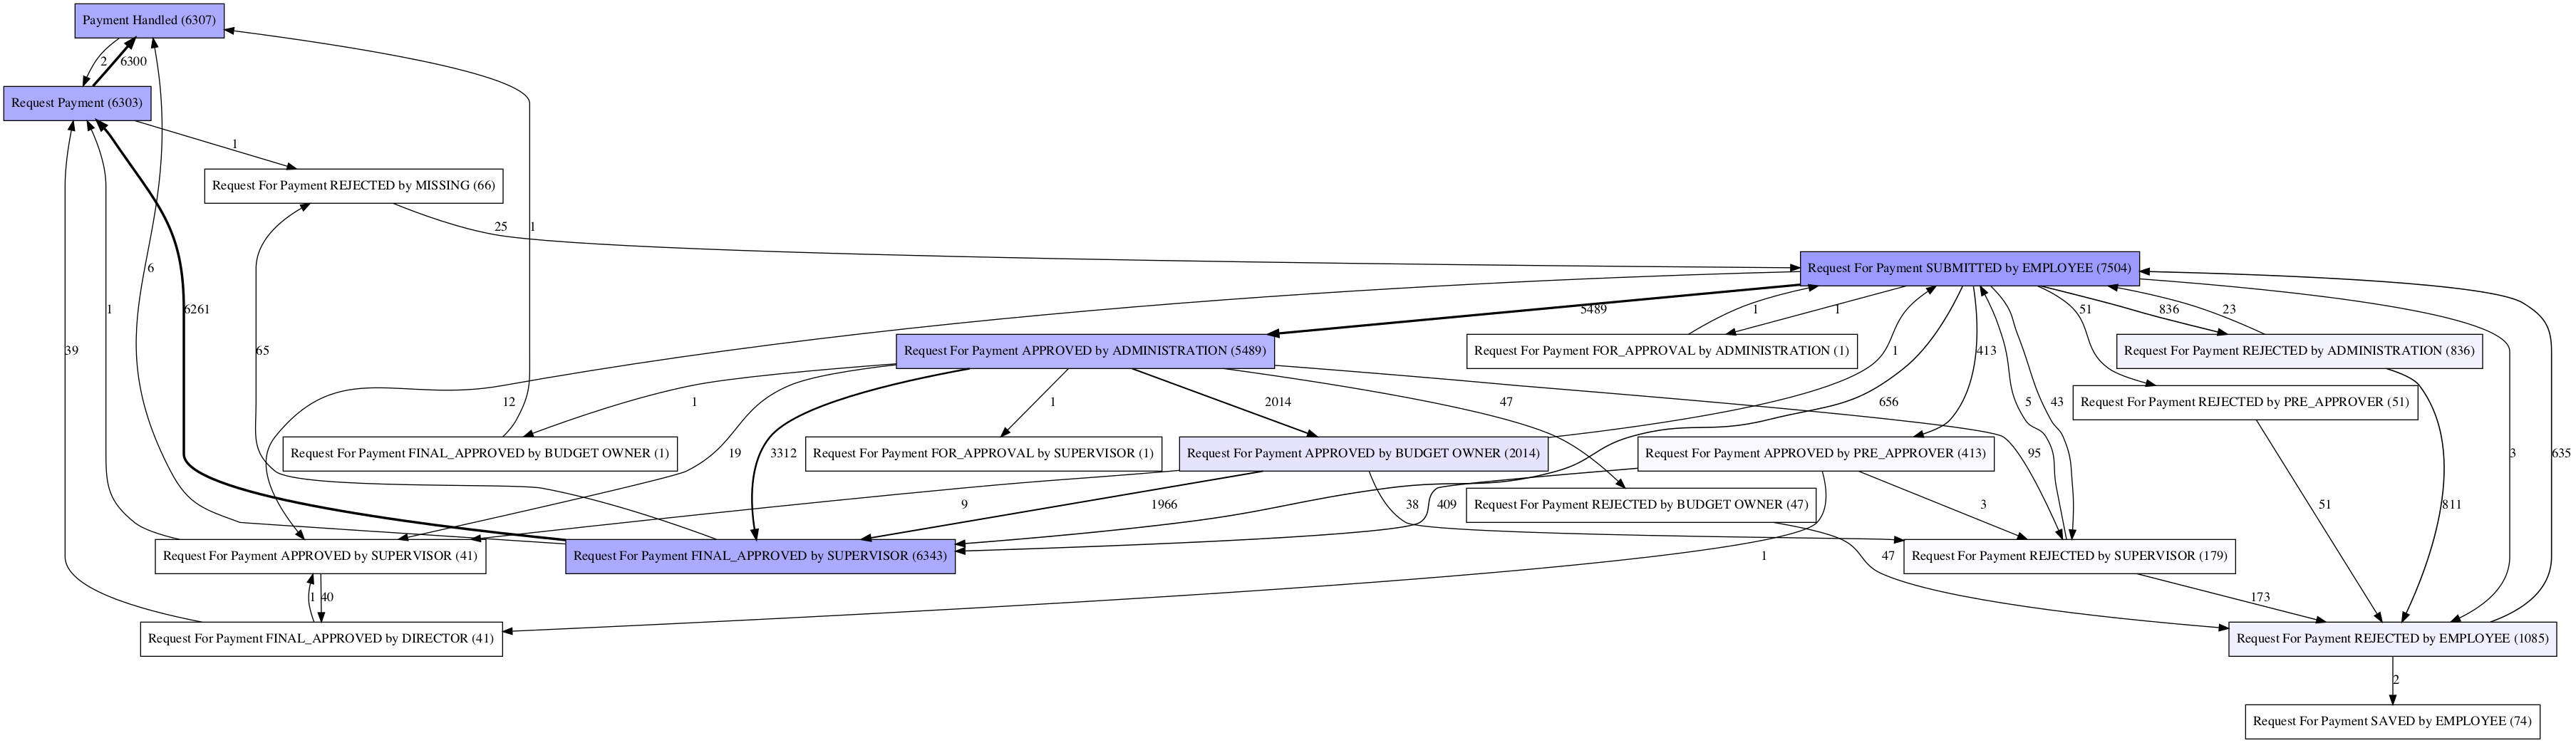

In [4]:
from pm4py.visualization.dfg import factory as dfg_vis_factory

gviz = dfg_vis_factory.apply(dfg, log=log, variant="frequency")
dfg_vis_factory.view(gviz)

/Users/vladlenatrus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vladlenatrus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  after removing the cwd from sys.path.


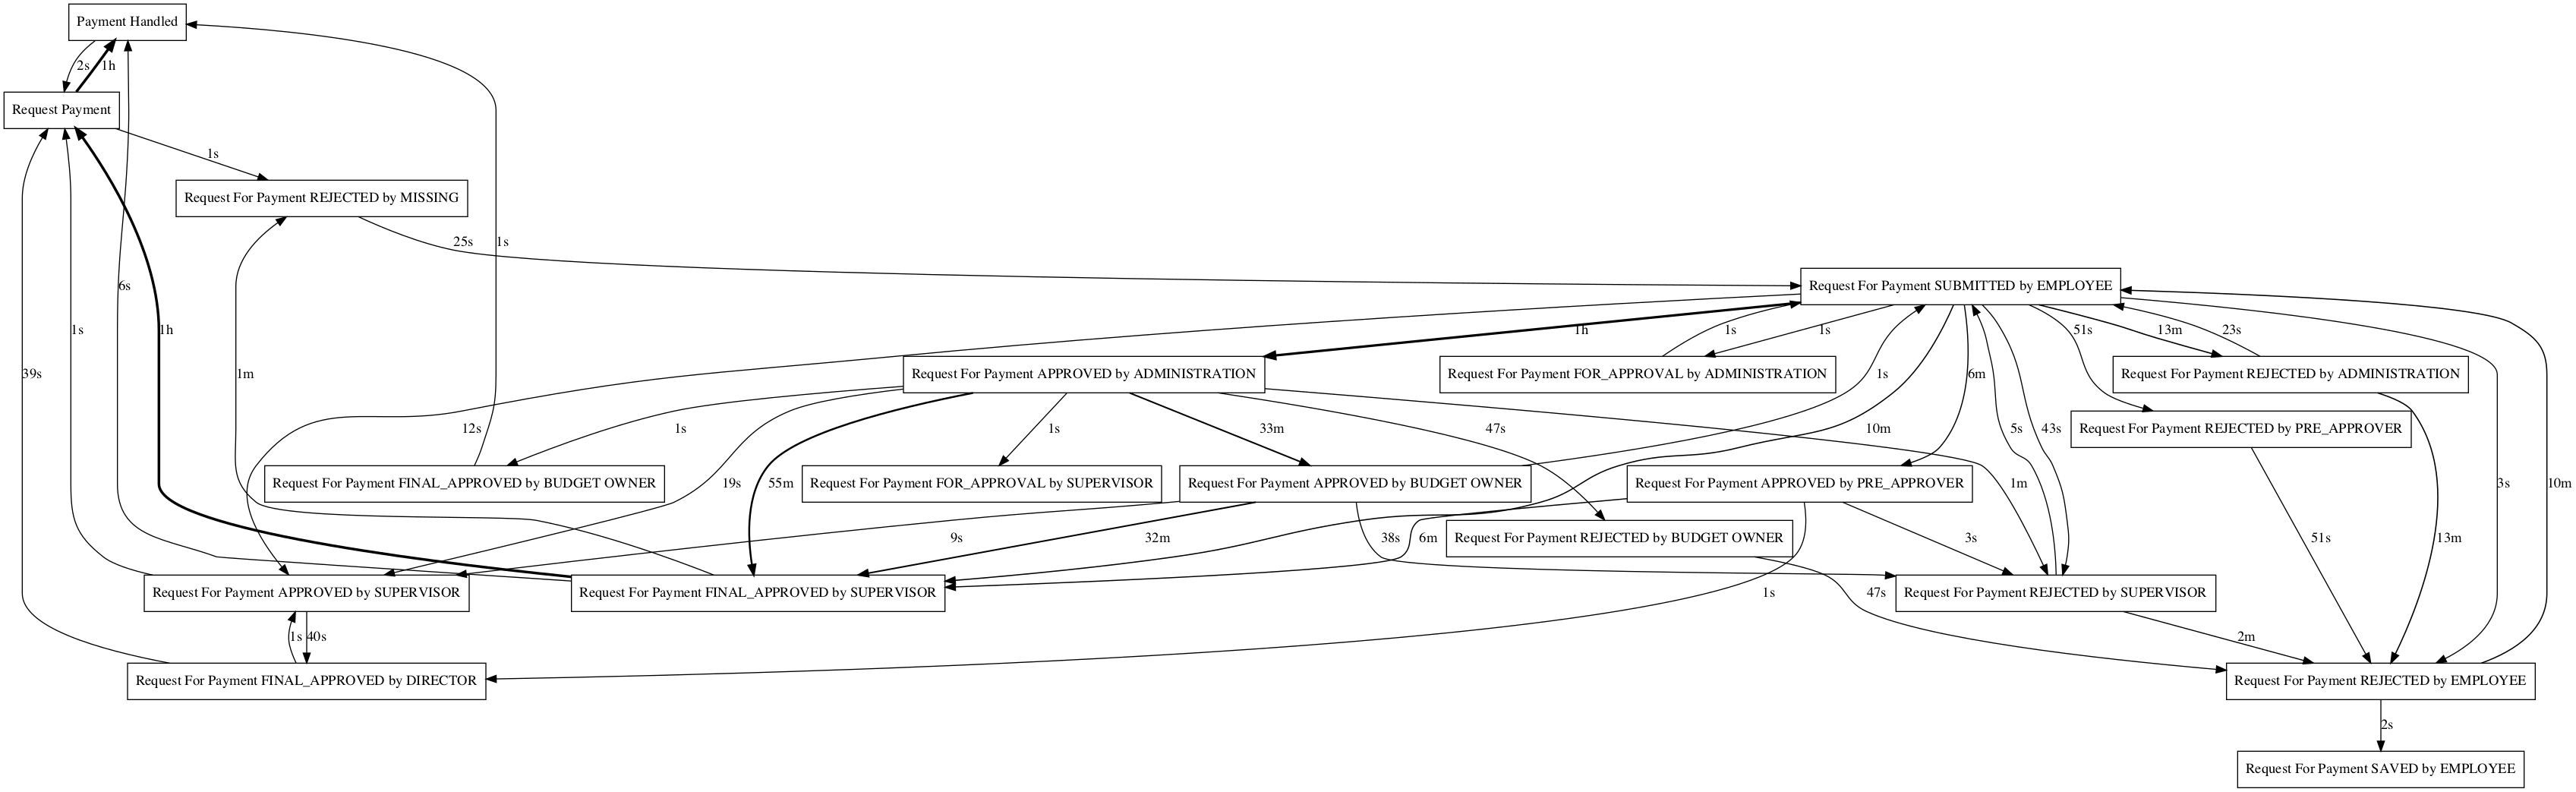

In [5]:
from pm4py.visualization.dfg import factory as dfg_vis_factory

gviz = dfg_vis_factory.apply(dfg, log=log, variant="performance")
dfg_vis_factory.view(gviz)

In [6]:
# from pm4py.algo.discovery.dfg import factory as dfg_factory
# from pm4py.visualization.dfg import factory as dfg_vis_factory

# dfg = dfg_factory.apply(log, variant="performance")
# parameters = {"format":"svg"}
# gviz = dfg_vis_factory.apply(dfg, log=log, variant="performance", parameters=parameters)
# dfg_vis_factory.save(gviz, "dfg.svg")

## Log skeleton

In [66]:
from pm4py.objects.log.importer.xes import importer as xes_importer
import os
log = xes_importer.apply(os.path.join('RequestForPayment.xes'))

In [67]:
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
skeleton = lsk_discovery.apply(log, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.0})

### Здесь строиттся дефолтный log skeleton 

1. Equivalence: contains the couples of activities that happen ALWAYS with the same frequency inside a trace.
2. Always-after: contains the couples of activities (A,B) such that an occurrence of A is ALWAYS followed, somewhen in the future of the trace, by an occurrence of B.
3. Always-before: contains the couples of activities (B,A) such that an occurrence of B is ALWAYS preceded, somewhen in the past of the trace, by an occurrence of A.
4. Never-together: contains the couples of activities (A,B) that NEVER happens together in the history of the trace.
5. Directly-follows: contains the list of directly-follows relations of the log.

In [68]:
skeleton

{'equivalence': {('Request For Payment APPROVED by SUPERVISOR',
   'Request For Payment FINAL_APPROVED by DIRECTOR'),
  ('Request For Payment FINAL_APPROVED by BUDGET OWNER', 'Payment Handled'),
  ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
   'Request For Payment APPROVED by ADMINISTRATION'),
  ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
   'Request For Payment SUBMITTED by EMPLOYEE'),
  ('Request For Payment FINAL_APPROVED by DIRECTOR',
   'Request For Payment APPROVED by SUPERVISOR'),
  ('Request For Payment FOR_APPROVAL by ADMINISTRATION', 'Payment Handled'),
  ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
   'Request For Payment APPROVED by ADMINISTRATION'),
  ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
   'Request For Payment APPROVED by BUDGET OWNER'),
  ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
   'Request For Payment FINAL_APPROVED by SUPERVISOR'),
  ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
   'Request For Pa

In [69]:
skeleton['equivalence']

{('Request For Payment APPROVED by SUPERVISOR',
  'Request For Payment FINAL_APPROVED by DIRECTOR'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER', 'Payment Handled'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
  'Request For Payment APPROVED by ADMINISTRATION'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
  'Request For Payment SUBMITTED by EMPLOYEE'),
 ('Request For Payment FINAL_APPROVED by DIRECTOR',
  'Request For Payment APPROVED by SUPERVISOR'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION', 'Payment Handled'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment APPROVED by ADMINISTRATION'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment APPROVED by BUDGET OWNER'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment FINAL_APPROVED by SUPERVISOR'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment REJECTED by EMPLOYEE'),
 ('

In [70]:
from pm4py.objects.log.importer.xes import importer as xes_importer
import os
log = xes_importer.apply(os.path.join('RequestForPayment.xes'))
from copy import deepcopy
from pm4py.algo.filtering.log.variants import variants_filter
filtered_log = variants_filter.apply_auto_filter(deepcopy(log))

In [75]:
filtered_log

[{'attributes': {'Rfp_id': 'request for payment 159193', 'Project': 'project 147620', 'Task': 'task 76059', 'concept:name': 'request for payment 159193', 'OrganizationalEntity': 'organizational unit 65463', 'Cost Type': 0, 'RequestedAmount': 91.01847341754711, 'Activity': 'activity 505', 'RfpNumber': 'request for payment number 159194'}, 'events': [{'id': 'st_step 159196_0', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Request For Payment SUBMITTED by EMPLOYEE', 'time:timestamp': datetime.datetime(2018, 1, 7, 22, 42, 31, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'EMPLOYEE'}, '..', {'id': 'rp_request for payment 159193_16', 'org:resource': 'SYSTEM', 'concept:name': 'Payment Handled', 'time:timestamp': datetime.datetime(2018, 1, 15, 17, 31, 33, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'org:role': 'UNDEFINED'}]}, '....', {'attributes': {'Rfp_id': 'request for payment 185000', 'Project': 'project 147860', 'Task': 'task 152704', 'concep

In [71]:
from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
conf_result = lsk_conformance.apply(filtered_log, skeleton)

In [74]:
len(conf_result)

4773

In [72]:
conf_result

[{'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 21,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total':

In [80]:
from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
conf_result = lsk_conformance.apply(log, skeleton)


In [81]:
conf_result

[{'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 37,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 16,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 26,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 37,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 37,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 16,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 16,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 25,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total': 0,
  'no_constr_total': 16,
  'dev_fitness': 1.0,
  'is_fit': True},
 {'deviations': [],
  'no_dev_total':

### Добавим 2%, 3%, 5% и 10% шум.

In [37]:
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
skeleton_2 = lsk_discovery.apply(log, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.02})

from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
conf_result = lsk_conformance.apply(log, skeleton_2)


In [38]:
skeleton['equivalence']

{('Request For Payment APPROVED by SUPERVISOR',
  'Request For Payment FINAL_APPROVED by DIRECTOR'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER', 'Payment Handled'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
  'Request For Payment APPROVED by ADMINISTRATION'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
  'Request For Payment SUBMITTED by EMPLOYEE'),
 ('Request For Payment FINAL_APPROVED by DIRECTOR',
  'Request For Payment APPROVED by SUPERVISOR'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION', 'Payment Handled'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment APPROVED by ADMINISTRATION'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment APPROVED by BUDGET OWNER'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment FINAL_APPROVED by SUPERVISOR'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment REJECTED by EMPLOYEE'),
 ('

In [39]:
skeleton_2['equivalence']

{('Payment Handled', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
 ('Payment Handled', 'Request Payment'),
 ('Request For Payment APPROVED by SUPERVISOR',
  'Request For Payment FINAL_APPROVED by DIRECTOR'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER', 'Payment Handled'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
  'Request For Payment APPROVED by ADMINISTRATION'),
 ('Request For Payment FINAL_APPROVED by BUDGET OWNER',
  'Request For Payment SUBMITTED by EMPLOYEE'),
 ('Request For Payment FINAL_APPROVED by DIRECTOR',
  'Request For Payment APPROVED by SUPERVISOR'),
 ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Payment Handled'),
 ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION', 'Payment Handled'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Request For Payment APPROVED by ADMINISTRATION'),
 ('Request For Payment FOR_APPROVAL by ADMINISTRATION',
  'Re

In [41]:
conf_result[0]

{'deviations': [('activ_freq',
   ('Request For Payment FINAL_APPROVED by SUPERVISOR', 2)),
  ('activ_freq', ('Request For Payment REJECTED by MISSING', 1)),
  ('equivalence',
   (('Request Payment', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
    ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
    ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Payment Handled'),
    ('Payment Handled', 'Request For Payment FINAL_APPROVED by SUPERVISOR'))),
  ('never_together',
   (('Request Payment', 'Request For Payment REJECTED by MISSING'),
    ('Payment Handled', 'Request For Payment REJECTED by MISSING'),
    ('Request For Payment SUBMITTED by EMPLOYEE',
     'Request For Payment REJECTED by MISSING'),
    ('Request For Payment FINAL_APPROVED by SUPERVISOR',
     'Request For Payment REJECTED by MISSING')))],
 'no_dev_total': 10,
 'no_constr_total': 85,
 'dev_fitness': 0.8823529411764706,
 'is_fit': False}

In [42]:
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
skeleton_3 = lsk_discovery.apply(log, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.03})

from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
conf_result = lsk_conformance.apply(log, skeleton_3)



In [44]:
conf_result

[{'deviations': [('activ_freq',
    ('Request For Payment FINAL_APPROVED by SUPERVISOR', 2)),
   ('activ_freq', ('Request For Payment REJECTED by MISSING', 1)),
   ('equivalence',
    (('Request Payment', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Payment Handled'),
     ('Payment Handled', 'Request For Payment FINAL_APPROVED by SUPERVISOR'))),
   ('never_together',
    (('Request Payment', 'Request For Payment REJECTED by MISSING'),
     ('Payment Handled', 'Request For Payment REJECTED by MISSING'),
     ('Request For Payment SUBMITTED by EMPLOYEE',
      'Request For Payment REJECTED by MISSING'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR',
      'Request For Payment REJECTED by MISSING')))],
  'no_dev_total': 10,
  'no_constr_total': 88,
  'dev_fitness': 0.8863636363636364,
  'is_fit': False},
 {'deviations': [],
  'no_dev_

### Здесь уже видно, что добавив шум, некоторые пути начинают классфицироваться как некорректные.

In [45]:
conf_result[0]

{'deviations': [('activ_freq',
   ('Request For Payment FINAL_APPROVED by SUPERVISOR', 2)),
  ('activ_freq', ('Request For Payment REJECTED by MISSING', 1)),
  ('equivalence',
   (('Request Payment', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
    ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
    ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Payment Handled'),
    ('Payment Handled', 'Request For Payment FINAL_APPROVED by SUPERVISOR'))),
  ('never_together',
   (('Request Payment', 'Request For Payment REJECTED by MISSING'),
    ('Payment Handled', 'Request For Payment REJECTED by MISSING'),
    ('Request For Payment SUBMITTED by EMPLOYEE',
     'Request For Payment REJECTED by MISSING'),
    ('Request For Payment FINAL_APPROVED by SUPERVISOR',
     'Request For Payment REJECTED by MISSING')))],
 'no_dev_total': 10,
 'no_constr_total': 88,
 'dev_fitness': 0.8863636363636364,
 'is_fit': False}

In [46]:
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
skeleton_5 = lsk_discovery.apply(log, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.05})

from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
conf_result = lsk_conformance.apply(log, skeleton_5)


In [48]:
conf_result

[{'deviations': [('activ_freq',
    ('Request For Payment FINAL_APPROVED by SUPERVISOR', 2)),
   ('activ_freq', ('Request For Payment REJECTED by MISSING', 1)),
   ('equivalence',
    (('Payment Handled', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request Payment', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request For Payment APPROVED by PRE_APPROVER',
      'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Payment Handled'))),
   ('never_together',
    (('Request Payment', 'Request For Payment REJECTED by MISSING'),
     ('Payment Handled', 'Request For Payment REJECTED by MISSING'),
     ('Request For Payment SUBMITTED by EMPLOYEE',
      'Request For Payment REJECTED by MISSING'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR',
      'Request For Payment REJECTED by MISSING')))],
  'no_dev_total': 11,

In [49]:
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
skeleton_10 = lsk_discovery.apply(log, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.1})

from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
conf_result = lsk_conformance.apply(log, skeleton_10)



In [50]:
conf_result

[{'deviations': [('activ_freq',
    ('Request For Payment APPROVED by PRE_APPROVER', 1)),
   ('activ_freq', ('Request For Payment FINAL_APPROVED by SUPERVISOR', 2)),
   ('activ_freq', ('Request For Payment REJECTED by MISSING', 1)),
   ('activ_freq', ('Request For Payment SUBMITTED by EMPLOYEE', 2)),
   ('equivalence',
    (('Payment Handled', 'Request For Payment SUBMITTED by EMPLOYEE'),
     ('Request Payment', 'Request For Payment SUBMITTED by EMPLOYEE'),
     ('Payment Handled', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request Payment', 'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request For Payment APPROVED by PRE_APPROVER',
      'Request For Payment FINAL_APPROVED by SUPERVISOR'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
     ('Request For Payment FINAL_APPROVED by SUPERVISOR', 'Payment Handled'))),
   ('never_together',
    (('Request For Payment SUBMITTED by EMPLOYEE',
      'Request For Payment REJECTED b

Вероятно, F-score считается таким способом (?)

In [62]:
count_true = 0
for trace in conf_result:
    if trace['is_fit'] == True:
        count_true += 1

In [64]:
count_true / len(conf_result)

0.7778100493755445